## Self-organizing map (SOM )算法
1. 设计一个节点网格，其中节点为权重，与数据的维数相同，每个节点的权重设为一个随机数（典型的为正态分布）
2. 将数据排列在网络上，对于每一个数据，节点上的权重与其最近的点，被称为最佳匹配单元（best matching unit,BMU）
3. BMU 定义好后,所有的BMU 的临近值也更新，所以他们的权重向量也更接近BMU的值。BMU周围的邻居数量随着时间的推移在
<p> 速率通常由反复试验确定


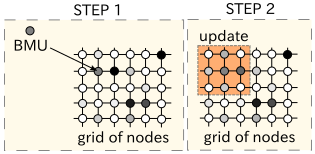

### 问题：
<span class="burk">如何更新BMU附近的点？</span>
#### 更新方式为：
    1. 找到BMU位置，
    2. 根据位置更新影响因子（neigh_factor），根据迭代次数更新速率（rate），
    3. 将最后算出的影响因子（rate_factor）与训练数据与构建的网络的差值相乘，将最后的差值与前一步网络的值相加
## Summary</span>
<span class="burk">If the number of clusters is not specified, we can use the self-organizing map (SOM)
<p><span class="burk">algorithm to view the data in a simplified perspective</span></span>

In [7]:
import tensorflow as tf
import os
class SOM:
    def __init__(self, width,height,dim):
        self.num_iters = 100
        self.width = width
        self.height = height
        self.dim = dim
        self.node_locs = self.get_locs()
        
        nodes = tf.Variable(tf.random_normal([width*height,dim]))
        self.nodes = nodes
        
        x = tf.placeholder(tf.float32,[dim])
        iter_ = tf.placeholder(tf.float32)
        
        self.x = x
        self.iter_ = iter_
        bmu_loc = self.get_bmu_loc(x)
        
        self.propagate_nodes = self.get_propagation(bmu_loc,x,iter_)
        
    # update the vaules of neighbors
    def get_propagation(self,bmu_loc,x,iter_):
        num_nodes = self.width * self.height
        rate = 1.0 - tf.div(iter_, self.num_iters)
        alpha = rate * 0.5
        sigma = rate * tf.to_float(tf.maximum(self.width, self.height))/2
        expend_bmu_loc = tf.expand_dims(tf.to_float(bmu_loc),0)
        sqr_dists_from_bmu = tf.reduce_sum(tf.square(tf.subtract(expend_bmu_loc, self.node_locs)),1)
        neigh_factor = \
            tf.exp(-tf.div(sqr_dists_from_bmu, 2*tf.square(sigma)))
        rate = tf.multiply(alpha,neigh_factor)
        rate_factor = tf.stack([tf.tile(tf.slice(rate,[i],[1]),[self.dim]) for i in range(num_nodes)])
        nodes_diff = tf.multiply(rate_factor, 
                                 tf.subtract(tf.stack([x for i in range(num_nodes)]),self.nodes))
        update_nodes = tf.add(self.nodes,nodes_diff)
        return tf.assign(self.nodes,update_nodes)
    # get the nodel location of closest match
    def get_bmu_loc(self,x):
        expanded_x = tf.expand_dims(x,0)
        sqr_diff = tf.square(tf.subtract(expanded_x,self.nodes))
        dists = tf.reduce_sum(sqr_diff,1)
        bmu_idx = tf.argmin(dists,0)
        bmu_loc = tf.stack([tf.mod(bmu_idx,self.width),tf.div(bmu_idx,self.width)])
        return bmu_loc
    # generate a matrix of points
    def get_locs(self):
        locs = [[x,y]
                for y in range(self.height)
                for x in range(self.width)]
        #return tf.to_float(locs)
        return tf.cast(locs,tf.float32)
    # run the SOM algorithm
    def train(self,data):
        with tf.compat.v1.Session() as sess:
            sess.run(tf.global_variables_initializer())
            for i in range(self.num_iters):
                for data_x in data:
                    sess.run(self.propagate_nodes,feed_dict = {self.x: data_x, self.iter_: i})
            centroid_grid = [[] for i in range(self.width)]
            self.nodes_val = list(sess.run(self.nodes))
            self.locs_val = list(sess.run(self.node_locs))
            for i ,l in enumerate(self.locs_val):
                #try:
                centroid_grid[int(l[0])].append(self.nodes_val[i])
                #except  TypeError:
                    #print("centroid_grid = ",centroid_grid)
                    #input()
            self.centroid_grid = centroid_grid

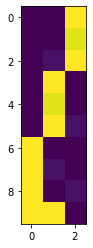

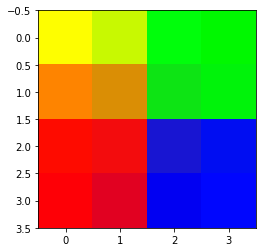

In [8]:
# test out and visualize results
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
colors = np.array(
[[0., 0., 1.],
[0., 0., 0.95],
[0., 0.05, 1.],
[0., 1., 0.],
[0., 0.95, 0.],
[0., 1, 0.05],
[1., 0., 0.],
[1., 0.05, 0.],
[1., 0., 0.05],
[1., 1., 0.]])
plt.imshow(colors)
plt.show()

som = SOM(4,4,3)
som.train(colors)
plt.imshow(som.centroid_grid)
plt.show()


In [2]:
#遍历的一个技巧
height = 3
width = 4
locs = [[x,y]
            for y in range(height)
            for x in range(width)]
print(locs)

[[0, 0], [1, 0], [2, 0], [3, 0], [0, 1], [1, 1], [2, 1], [3, 1], [0, 2], [1, 2], [2, 2], [3, 2]]


In [17]:
result = som.centroid_grid
print(type(result))
p = result[0]
#print(p.shape)
print(len(result))

<class 'list'>
4


In [14]:
import tensorflow as tf
y = [[1],[2],[3],[4],[5],[6],[7],[8],[9],[10]]
num_nodes = 3
dim = 1
#x = tf.placeholder(tf.float32,[dim])
b = tf.stack([y for i in range(num_nodes)])
with tf.compat.v1.Session() as sess:
    c = sess.run(b)
    print(tf.shape(c))
    print(c.shape)

Tensor("Shape_4:0", shape=(3,), dtype=int32)
(3, 10, 1)
